# Flight Price Prediction

Flight price prediction is a common use case for machine learning, where given some input features such as departure date, arrival date, airline, etc., the algorithm predicts the price of a flight. In this project, we will develop a machine learning algorithm to predict the price of a flight based on historical data.

In [1]:
#installing important libraries
!pip3 install pandas --quiet
!pip3 install numpy --quiet
!pip3 install matplotlib --quiet
!pip3 install seaborn --quiet
!pip3 install sklearn --quiet
!pip3 install scipy --quiet
!pip3 install openpyxl --quiet

In [2]:
#importing required packages from the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

The dataset used for this project has been obtained from https://www.kaggle.com/datasets/shubhamsarafo/flight-price. The dataset will include features such as departure date, departure time, arrival time, airline, source, destination, etc.

In [3]:
#importing the dataset
flight_data=pd.read_excel('flight_price.xlsx')

In [4]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Before training the model, we need to preprocess the data. This includes handling missing values, encoding categorical variables, scaling numerical features, etc. We will use various preprocessing techniques such as One-hot encoding, Label Encoding, and Standard Scaling.

In [7]:
#looking for null values
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#dropping the null values
flight_data.dropna(inplace=True)

In [9]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

As we checked the dataset on excel, we found a row in which the the duration of journey is 5 min which seems to be an outlier so we will remove that row from the dataset.

In [10]:
flight_data.iloc[[6474]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327


In [11]:
flight_data.drop(6474,axis=0,inplace=True)

In [12]:
flight_data.iloc[[6474]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6475,Air India,09/03/2019,Banglore,New Delhi,BLR → DEL,17:00,19:50,2h 50m,non-stop,No info,9481


In [13]:
#resetting the index as we have deleted one row
flight_data.reset_index(inplace=True,drop=True)
flight_data.iloc[[6474]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,09/03/2019,Banglore,New Delhi,BLR → DEL,17:00,19:50,2h 50m,non-stop,No info,9481


In [14]:
flight_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [15]:
#converting the datatype of Journey Date from object to datetime_format
flight_data['Date_of_Journey']=pd.to_datetime(flight_data['Date_of_Journey'],infer_datetime_format=True)

In [16]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  object        
 6   Arrival_Time     10681 non-null  object        
 7   Duration         10681 non-null  object        
 8   Total_Stops      10681 non-null  object        
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.0+ KB


In [17]:
#extracting the date and month from the Journey Day column 
flight_data['Journey_Day']=flight_data['Date_of_Journey'].dt.day
flight_data['Journey_Month']=flight_data['Date_of_Journey'].dt.month

In [18]:
#dropping the journey data column since it is redundant now
flight_data.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
flight_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10677,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10678,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10679,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [20]:
#resetting the datatype of Depature time and Arrival time from object to datetime_format 
flight_data['Dep_Time']=pd.to_datetime(flight_data['Dep_Time'],infer_datetime_format=True)
flight_data['Arrival_Time']=pd.to_datetime(flight_data['Arrival_Time'],infer_datetime_format=True)  

In [21]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Source           10681 non-null  object        
 2   Destination      10681 non-null  object        
 3   Route            10681 non-null  object        
 4   Dep_Time         10681 non-null  datetime64[ns]
 5   Arrival_Time     10681 non-null  datetime64[ns]
 6   Duration         10681 non-null  object        
 7   Total_Stops      10681 non-null  object        
 8   Additional_Info  10681 non-null  object        
 9   Price            10681 non-null  int64         
 10  Journey_Day      10681 non-null  int64         
 11  Journey_Month    10681 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1001.5+ KB


In [22]:
#defining functions to extract the hour part from datetime stamp:
def extract_hour(df,column_name):
    df[column_name+"_hour"]=df[column_name].dt.hour

In [23]:
#defining functions to extract the minute part from datetime stamp:
def extract_min(df,column_name):
    df[column_name+"_minutes"]=df[column_name].dt.minute

In [24]:
#extracting the hour and minute part from Dep_Time and Arrival_Time:
extract_hour(flight_data,"Dep_Time")
extract_min(flight_data,"Dep_Time")
extract_hour(flight_data,"Arrival_Time")
extract_min(flight_data,"Arrival_Time")

In [25]:
#dropping Dep_Time and Arrival_Time columns since they are redundant now
flight_data.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [26]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10681 non-null  object
 1   Source                10681 non-null  object
 2   Destination           10681 non-null  object
 3   Route                 10681 non-null  object
 4   Duration              10681 non-null  object
 5   Total_Stops           10681 non-null  object
 6   Additional_Info       10681 non-null  object
 7   Price                 10681 non-null  int64 
 8   Journey_Day           10681 non-null  int64 
 9   Journey_Month         10681 non-null  int64 
 10  Dep_Time_hour         10681 non-null  int64 
 11  Dep_Time_minutes      10681 non-null  int64 
 12  Arrival_Time_hour     10681 non-null  int64 
 13  Arrival_Time_minutes  10681 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


In [27]:
#making the data in Duration column uniform:
duration_list=list(flight_data["Duration"])
for i in range(len(duration_list)):
    if len(duration_list[i].split(" "))==2:
        pass
    else:
        if "h" in duration_list[i]:
            duration_list[i]=duration_list[i]+" 0m"
        else:
            duration_list[i]="0h "+duration_list[i]                                                                      

In [28]:
flight_data['Duration']=duration_list

In [29]:
flight_data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10676    2h 30m
10677    2h 35m
10678     3h 0m
10679    2h 40m
10680    8h 20m
Name: Duration, Length: 10681, dtype: object

In [30]:
# function for separating the hour part from Duration
def hour(x):
    return x.split(" ")[0][0:-1]

In [31]:
#function for separating the minute part from Duration
def min(x):
    return x.split(" ")[1][0:-1]

In [32]:
#separating the hour and minute part by applying the above defined functions to each row of dataset
flight_data["Duration_hours"]=flight_data["Duration"].apply(hour)
flight_data["Duration_mins"]=flight_data["Duration"].apply(min)

In [33]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10681 non-null  object
 1   Source                10681 non-null  object
 2   Destination           10681 non-null  object
 3   Route                 10681 non-null  object
 4   Duration              10681 non-null  object
 5   Total_Stops           10681 non-null  object
 6   Additional_Info       10681 non-null  object
 7   Price                 10681 non-null  int64 
 8   Journey_Day           10681 non-null  int64 
 9   Journey_Month         10681 non-null  int64 
 10  Dep_Time_hour         10681 non-null  int64 
 11  Dep_Time_minutes      10681 non-null  int64 
 12  Arrival_Time_hour     10681 non-null  int64 
 13  Arrival_Time_minutes  10681 non-null  int64 
 14  Duration_hours        10681 non-null  object
 15  Duration_mins         10681 non-null

In [34]:
#converting the datatype of Duration_hours and Duration_mins from object to int
flight_data["Duration_hours"]=flight_data["Duration_hours"].astype(int)
flight_data["Duration_mins"]=flight_data["Duration_mins"].astype(int)

In [35]:
#dropping the Duration column since it is redundant now
flight_data.drop('Duration',axis=1,inplace=True)
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10681 non-null  object
 1   Source                10681 non-null  object
 2   Destination           10681 non-null  object
 3   Route                 10681 non-null  object
 4   Total_Stops           10681 non-null  object
 5   Additional_Info       10681 non-null  object
 6   Price                 10681 non-null  int64 
 7   Journey_Day           10681 non-null  int64 
 8   Journey_Month         10681 non-null  int64 
 9   Dep_Time_hour         10681 non-null  int64 
 10  Dep_Time_minutes      10681 non-null  int64 
 11  Arrival_Time_hour     10681 non-null  int64 
 12  Arrival_Time_minutes  10681 non-null  int64 
 13  Duration_hours        10681 non-null  int64 
 14  Duration_mins         10681 non-null  int64 
dtypes: int64(9), object(6)
memory usage:

In [36]:
flight_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
#mapping the integers through dictionary for number of stops for each flight
flight_data['Total_Stops']=flight_data['Total_Stops'].map({'1 stop':int(1),'2 stops':int(2),'3 stops':int(3),
                                                           '4 stops':int(4),'non-stop':int(0)})
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10681 non-null  object
 1   Source                10681 non-null  object
 2   Destination           10681 non-null  object
 3   Route                 10681 non-null  object
 4   Total_Stops           10681 non-null  int64 
 5   Additional_Info       10681 non-null  object
 6   Price                 10681 non-null  int64 
 7   Journey_Day           10681 non-null  int64 
 8   Journey_Month         10681 non-null  int64 
 9   Dep_Time_hour         10681 non-null  int64 
 10  Dep_Time_minutes      10681 non-null  int64 
 11  Arrival_Time_hour     10681 non-null  int64 
 12  Arrival_Time_minutes  10681 non-null  int64 
 13  Duration_hours        10681 non-null  int64 
 14  Duration_mins         10681 non-null  int64 
dtypes: int64(10), object(5)
memory usage

In [38]:
flight_data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10676    0
10677    0
10678    0
10679    0
10680    2
Name: Total_Stops, Length: 10681, dtype: int64

In [39]:
#dropping the Route column since we have already retained the number of stops column in the dataset 
flight_data.drop('Route',axis=1,inplace=True)

In [40]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


Text(0.5, 1.0, 'Heatmap for all numerical attributes')

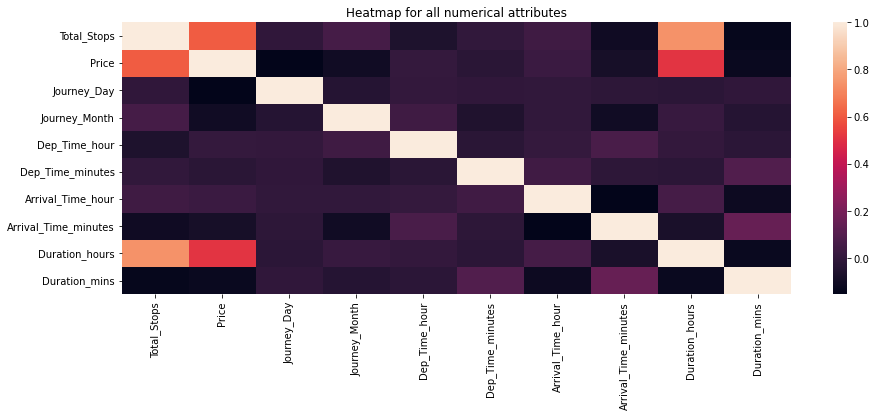

In [41]:
#plotting the correlation heatmap for all numerical attributes of the dataset
plt.figure(figsize=(15,5))
sns.heatmap(flight_data.corr())
plt.title('Heatmap for all numerical attributes')

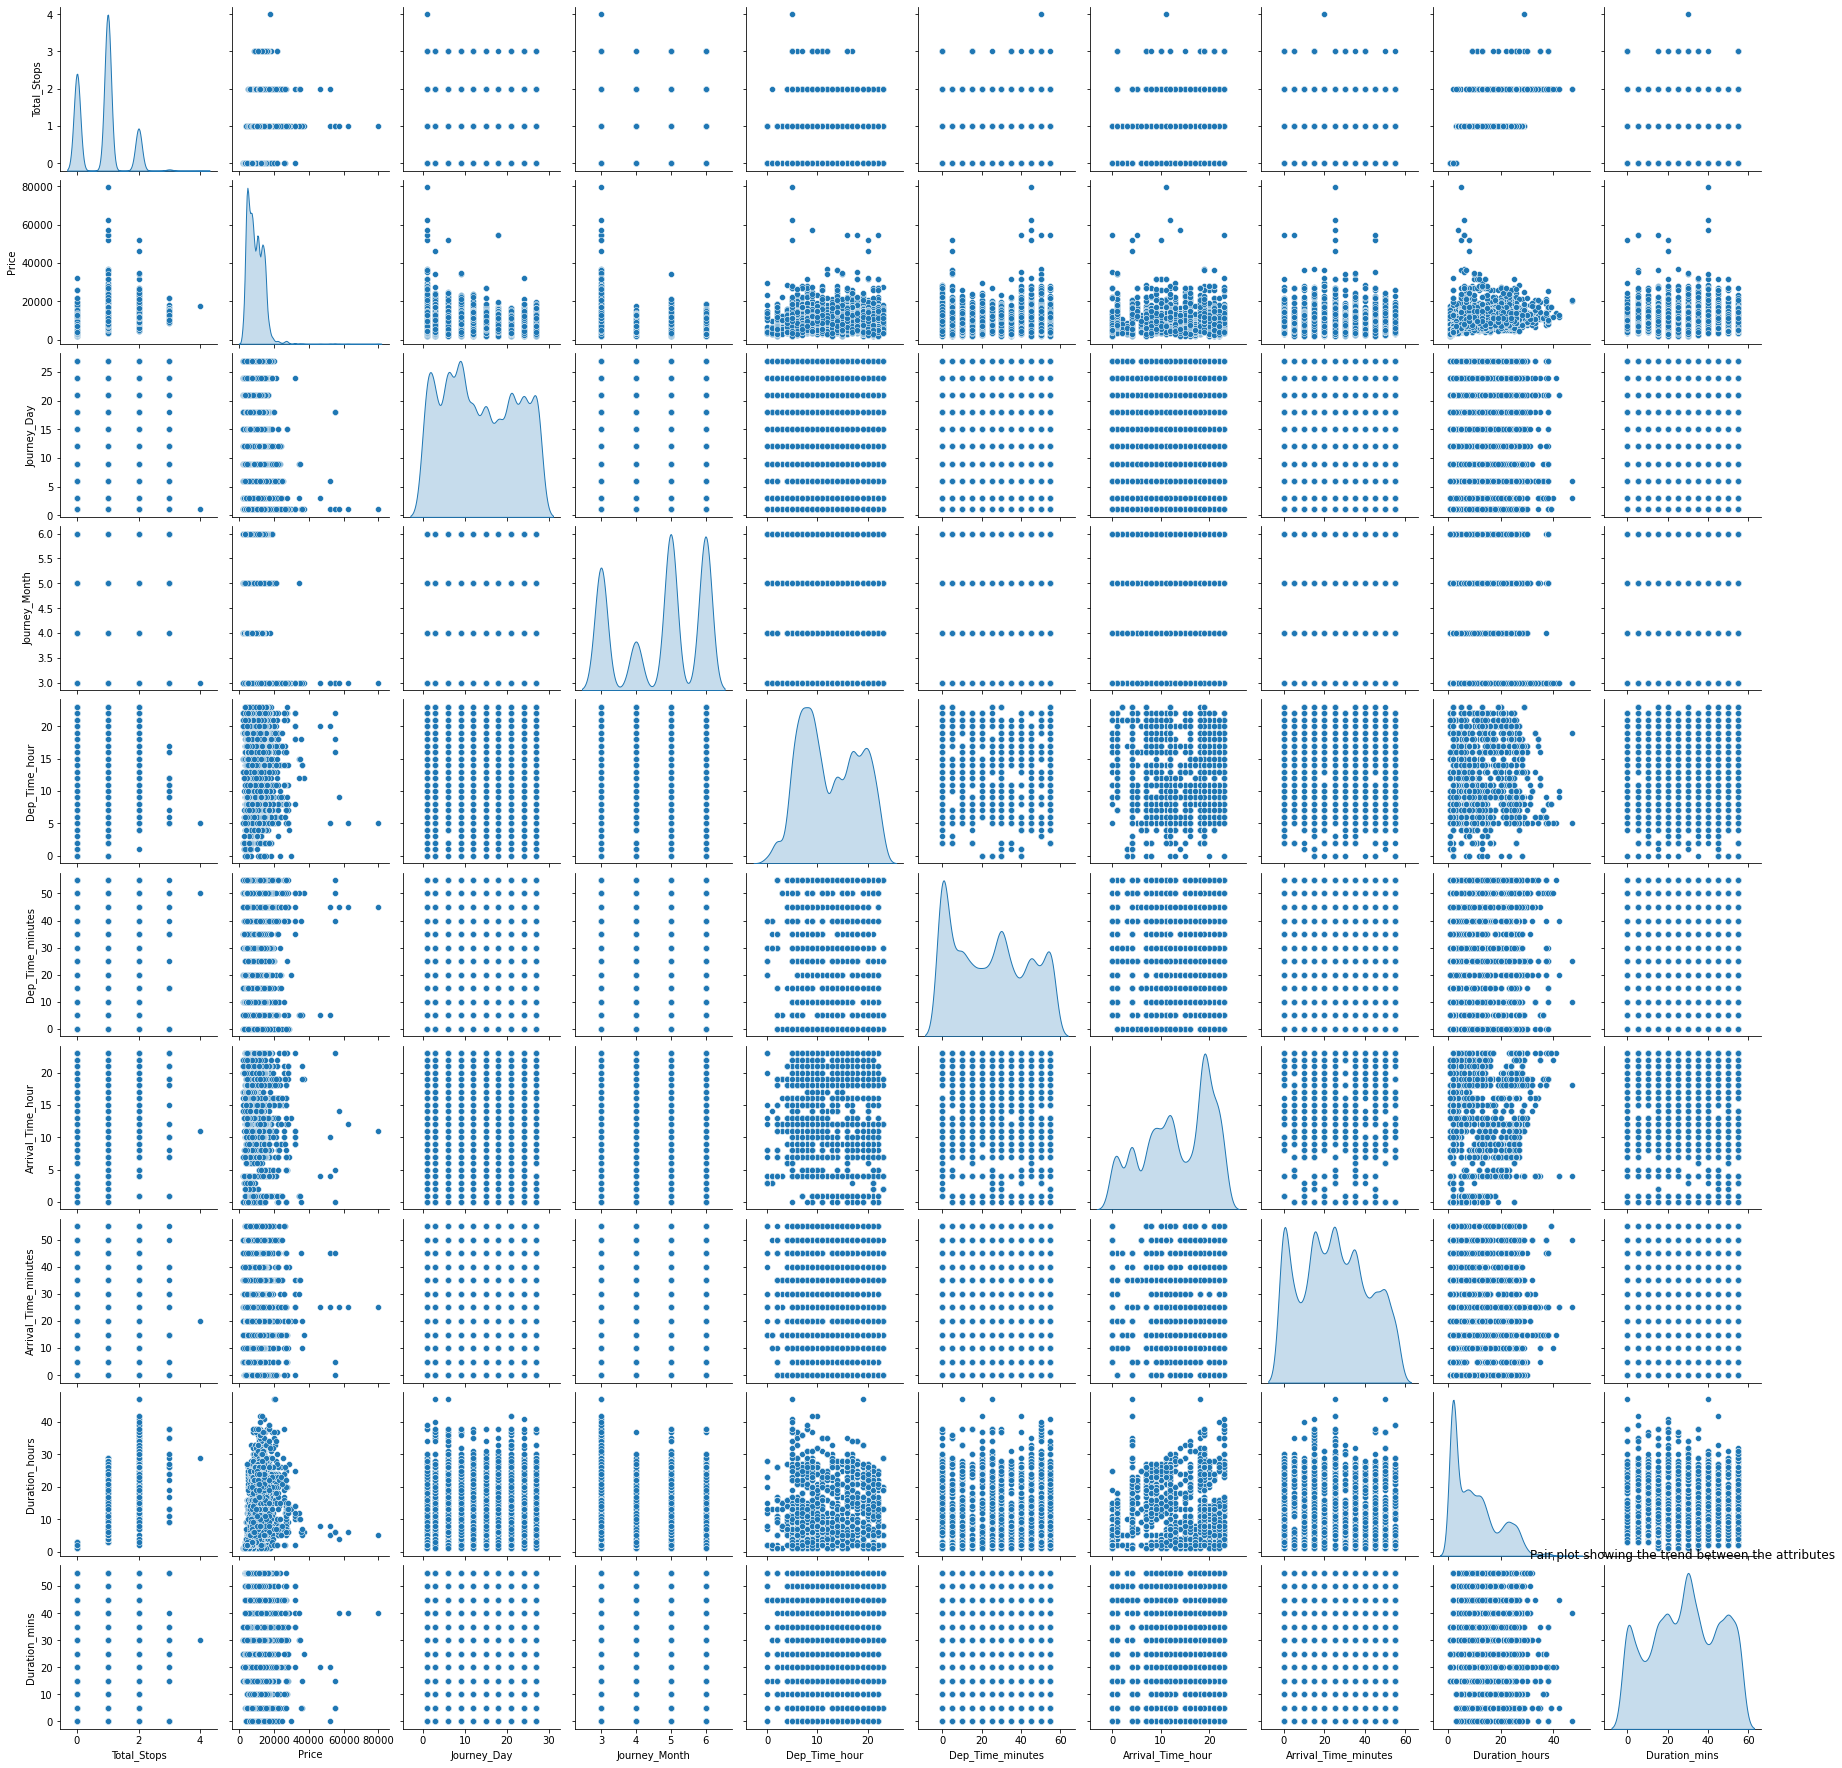

In [42]:
#generating the pair plot for all numerical attributes for better understanding of the correlation
sns.pairplot(flight_data,diag_kind='kde')
plt.title('Pair plot showing the trend between the attributes')
plt.show()

Text(0.5, 1.0, 'Airlines vs Price vs Total Stops')

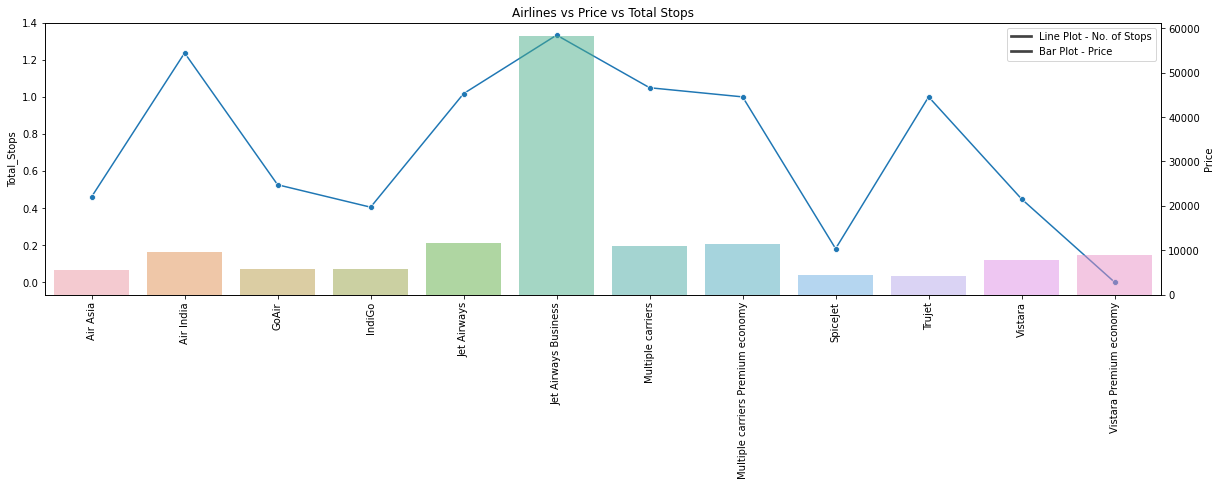

In [43]:
#plotting the graph for mean-price and mean-no. of stops for all airlines
flight_stop_price = flight_data[['Airline','Total_Stops','Price']].groupby('Airline').mean()
flight_stop_price = flight_stop_price.reset_index()

fig, ax1 = plt.subplots(figsize = (20,5))
sns.lineplot(data = flight_stop_price['Total_Stops'], sort = False, ax = ax1, marker = 'o' )
ax2=ax1.twinx()
sns.barplot(data = flight_stop_price, x='Airline', y='Price', ax=ax2, alpha=0.5)
ax1.tick_params(axis='x', rotation=90)
plt.legend(["Line Plot - No. of Stops", "Bar Plot - Price"], loc ="upper right")
plt.title('Airlines vs Price vs Total Stops')

Text(0.5, 1.0, 'Mean Price vs Total Stops')

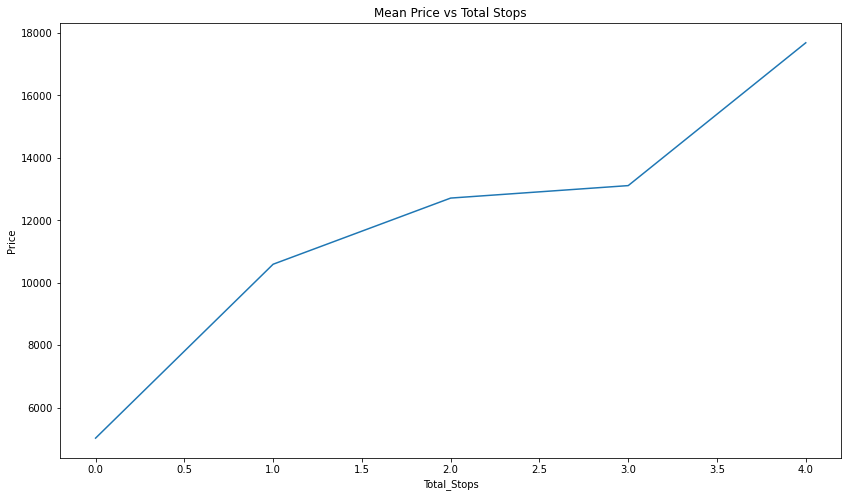

In [44]:
#plotting the trend between the mean price and mean number of stops
tp=flight_data[['Total_Stops','Price']].groupby('Total_Stops').mean()
plt.figure(figsize=(14,8))
sns.lineplot(data=tp, y="Price", x="Total_Stops")
plt.title('Mean Price vs Total Stops')

In [45]:
#fetching the categorical columns from the dataset
category_column=[category_column for category_column in flight_data.columns if flight_data[category_column].dtype=='O']
category_column

['Airline', 'Source', 'Destination', 'Additional_Info']

In [46]:
#fetching the numerical columns from the dataset
numeric_column=[numeric_column for numeric_column in flight_data.columns if flight_data[numeric_column].dtype!='O']
numeric_column

['Total_Stops',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hours',
 'Duration_mins']

In [47]:
#fetching categorical data from the dataset
cat_data=flight_data[category_column]
cat_data

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info
...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,No info
10677,Air India,Kolkata,Banglore,No info
10678,Jet Airways,Banglore,Delhi,No info
10679,Vistara,Banglore,New Delhi,No info


In [48]:
cat_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

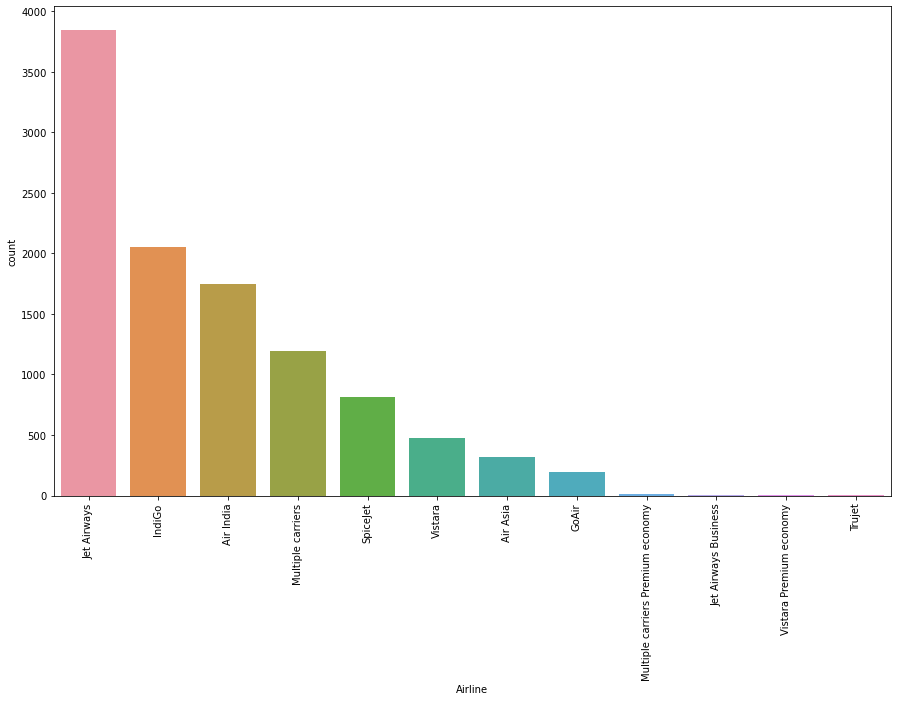

In [49]:
#plotting the number of records in the dataset for each airline
plt.figure(figsize=(15,9))
ax=sns.countplot(data=flight_data, x='Airline', order=flight_data.Airline.value_counts().index).tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

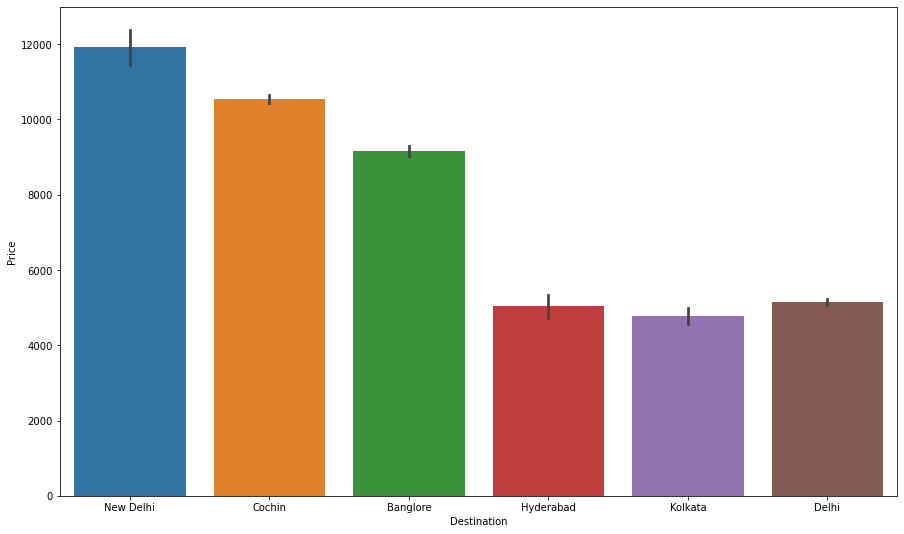

In [50]:
plt.figure(figsize=(15,9))
sns.barplot(y='Price',x='Destination',data=flight_data.sort_values('Price',ascending=False))

In [51]:
#encoding for categorical data
airline_dum=pd.get_dummies(flight_data['Airline'],drop_first=True)
source_destination_dum=pd.get_dummies(flight_data[['Source','Destination']],drop_first=True)

In [52]:
# concatenating the categorical data with the rest of the dataset and removing unecessary columns
flight_data=pd.concat([airline_dum,source_destination_dum,flight_data],axis=1)
flight_data.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [53]:
flight_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45


In [54]:
# splitting the dataset into independent and dependent variables
X = flight_data.drop('Price',axis=1)
Y = flight_data['Price']
print(X.shape, Y.shape)

(10681, 29) (10681,)


In [55]:
#independent dataset
X

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_New Delhi,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,0,0,1,0,0,0,0,0,0,0,...,1,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,0,0,0,0,0,0,0,0,0,...,0,0,9,4,19,55,22,25,2,30
10677,1,0,0,0,0,0,0,0,0,0,...,0,0,27,4,20,45,23,20,2,35
10678,0,0,0,1,0,0,0,0,0,0,...,0,0,27,4,8,20,11,20,3,0
10679,0,0,0,0,0,0,0,0,0,1,...,1,0,1,3,11,30,14,10,2,40


In [56]:
#dependent dataset
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10676     4107
10677     4145
10678     7229
10679    12648
10680    11753
Name: Price, Length: 10681, dtype: int64

In [57]:
#splitting the dataset into training and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [58]:
#importing required models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [59]:
#linear regression
lr=LinearRegression()
lr_model=lr.fit(X_train,Y_train)
print('Score : {}'.format(lr_model.score(X_train,Y_train)))
lr_predict=lr_model.predict(X_test)
lr_score=metrics.r2_score(lr_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Linear Regressor is:',lr_score)

Score : 0.6109605137581022
R-Squared Error OR Accuracy Score for Linear Regressor is: 0.4681573577978817


In [60]:
#ridge regression
ridge_r=Ridge()
ridge_model=ridge_r.fit(X_train,Y_train)
print('Score : {}'.format(ridge_model.score(X_train,Y_train)))
ridge_predict=ridge_model.predict(X_test)
ridge_score=metrics.r2_score(ridge_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Ridge Regressor is:',ridge_score)

Score : 0.6086032394376917
R-Squared Error OR Accuracy Score for Ridge Regressor is: 0.4435892639416982


In [61]:
#lasso regression 
lasso_r=Lasso()
lasso_model=lasso_r.fit(X_train,Y_train)
print('Score : {}'.format(lasso_model.score(X_train,Y_train)))
lasso_predict=lasso_model.predict(X_test)
lasso_score=metrics.r2_score(lasso_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Lasso Regressor is:',lasso_score)

Score : 0.6106768964821704
R-Squared Error OR Accuracy Score for Lasso Regressor is: 0.46143000957702496


In [62]:
#decision tree regression
dt=tree.DecisionTreeRegressor()
dt_model=dt.fit(X_train,Y_train)
print('Score : {}'.format(dt_model.score(X_train,Y_train)))
dt_predict=dt_model.predict(X_test)
dt_score=metrics.r2_score(dt_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Decision Tree Regressor is:',dt_score)

Score : 0.973694668706377
R-Squared Error OR Accuracy Score for Decision Tree Regressor is: 0.7319678011033319


In [63]:
#random forest regression
rf=RandomForestRegressor(n_estimators=250)
rf_model=rf.fit(X_train,Y_train)
print('Score : {}'.format(rf_model.score(X_train,Y_train)))
rf_predict=rf_model.predict(X_test)
rf_score=metrics.r2_score(rf_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Random Forest Regressor is:',rf_score)

Score : 0.95506369581867
R-Squared Error OR Accuracy Score for Random Forest Regressor is: 0.8073079859701779


In [64]:
#support vector regression
svr=SVR()
svr_model=svr.fit(X_train,Y_train)
print('Score : {}'.format(svr_model.score(X_train,Y_train)))
svr_predict=svr_model.predict(X_test)
svr_score=metrics.r2_score(svr_predict,Y_test)
print('R-Squared Error OR Accuracy Score for Support Vector Regressor is:',svr_score)

Score : -0.0011147383028120572
R-Squared Error OR Accuracy Score for Support Vector Regressor is: -1074.478069372062


In [65]:
#hyperparameter tuning for random forest regression model

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [66]:
#creating a randomized search grid
random_grid={'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split}

In [67]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [68]:
#hyperparameter tuning
reg_rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [69]:
#best parameters
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
prediction=rf_random.predict(X_test)
sns.distplot(Y_test-prediction)
metrics.r2_score(Y_test,prediction)

In [ ]:
print(rf_random.score(X_train,Y_train))
print('MAE',metrics.mean_absolute_error(Y_test,prediction))
print('MSE',metrics.mean_squared_error(Y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))
print(metrics.r2_score(prediction,Y_test))